# PHASE_5_CAPSTONE_PROJECT

# MODELING

## VGG16-Transfer learning modeling

In [6]:
import pandas as pd
import numpy as np
import csv
import json
import glob
import os
import shutil
import random
import pickle
import h5py
import hdf5storage
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from IPython.display import display
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras import layers
from keras.models import Sequential
from keras.layers import Reshape

from tensorflow.keras.layers import Dense # creates densely connected layer object
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array
from tensorflow.keras.layers import Conv2D # convolution layer
from tensorflow.keras.layers import MaxPooling2D # max pooling layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Dropout
from keras.models import load_model


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# a new layer that rescales/normalizes the activations after each layer.
# has a weak regularization effect. also allows 

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import layers, regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Resizing, RandomFlip, RandomRotation
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16

%matplotlib inline


In [8]:
# Directory path
train_data_dir_sample = '/Users/seanluong/Downloads/TransferX/Train_Test_Validation/Train'
val_data_dir_sample = '/Users/seanluong/Downloads/TransferX/Train_Test_Validation/Validation'
test_data_dir_sample = '/Users/seanluong/Downloads/TransferX/Train_Test_Validation/Test'


# Define the image size and number of classes
image_size_vgg = (224, 224)
num_classes = 10

# Define the preprocessing function (vgg_processor)
vgg_processor = preprocess_input
# vgg_processor = tf.keras.applications.VGG16.preprocess_input

# Create the train_datagen with vgg_processor
train_datagen_vgg = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False,
                                   preprocessing_function=vgg_processor)

# Create the val_datagen with vgg_processor
val_datagen_vgg = ImageDataGenerator(rescale=1./255,
                                 preprocessing_function=vgg_processor)

# Create the test_datagen with vgg_processor
test_datagen_vgg = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=vgg_processor)

# ...

# Flow data from the directory using the data generators
train_generator_vgg = train_datagen_vgg.flow_from_directory(directory=train_data_dir_sample,
                                                    target_size=image_size_vgg,
                                                    class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    classes=[str(i) for i in range(num_classes)])

val_generator_vgg = val_datagen_vgg.flow_from_directory(directory=val_data_dir_sample,
                                                target_size=image_size_vgg,
                                                class_mode='categorical',
                                                batch_size=64,
                                                shuffle=True,
                                                classes=[str(i) for i in range(num_classes)])

test_generator_vgg = test_datagen_vgg.flow_from_directory(directory=test_data_dir_sample,
                                                  target_size=image_size_vgg,
                                                  class_mode='categorical',
                                                  batch_size=64,
                                                  shuffle=False,
                                                  classes=[str(i) for i in range(num_classes)])


Found 14782 images belonging to 10 classes.
Found 4935 images belonging to 10 classes.
Found 4926 images belonging to 10 classes.


### VGG16 model

In [9]:
base_vgg_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_vgg_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [10]:
def custom_classifier(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

In [11]:
cnn_model_with_vgg16 = custom_classifier(base_vgg_model, num_classes)

In [12]:
cnn_model_with_vgg16.compile(loss='categorical_crossentropy',
                             optimizer='Adam',
                             metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

In [13]:
history_cnn_with_vgg16 = cnn_model_with_vgg16.fit(train_generator_vgg,
                                                  steps_per_epoch=len(train_generator_vgg),
                                                  epochs=50,
                                                  validation_data=val_generator_vgg,
                                                  validation_steps=len(val_generator_vgg))

Epoch 1/50
231/231 [==============================] - 1592s 7s/step - loss: 0.9693 - accuracy: 0.6923 - auc: 0.9601 - precision: 0.9008 - recall: 0.4393 - val_loss: 0.4172 - val_accuracy: 0.8727 - val_auc: 0.9926 - val_precision: 0.9137 - val_recall: 0.8067
Epoch 2/50
231/231 [==============================] - 1600s 7s/step - loss: 0.3979 - accuracy: 0.8785 - auc: 0.9932 - precision: 0.9216 - recall: 0.8170 - val_loss: 0.2722 - val_accuracy: 0.9129 - val_auc: 0.9957 - val_precision: 0.9314 - val_recall: 0.8918
Epoch 3/50
231/231 [==============================] - 1602s 7s/step - loss: 0.3093 - accuracy: 0.8958 - auc: 0.9950 - precision: 0.9202 - recall: 0.8684 - val_loss: 0.2273 - val_accuracy: 0.9228 - val_auc: 0.9964 - val_precision: 0.9326 - val_recall: 0.9117
Epoch 4/50
231/231 [==============================] - 1603s 7s/step - loss: 0.2663 - accuracy: 0.9048 - auc: 0.9958 - precision: 0.9215 - recall: 0.8884 - val_loss: 0.2125 - val_accuracy: 0.9271 - val_auc: 0.9965 - val_precisi

In [15]:
cnn_model_with_vgg16.save('cnn_model_with_vgg16.h5')

/Users/seanluong/miniforge3/envs/Thaoworkingenvironment/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
hdf5storage.savemat("history_cnn_with_vgg16_50epoch.h5", history_cnn_with_vgg16.history)

In [18]:
cnn_model_with_vgg16_loaded = load_model('cnn_model_with_vgg16.h5')

In [19]:
cnn_model_with_vgg16_loaded = hdf5storage.loadmat("history_cnn_with_vgg16_50epoch.h5")

In [21]:
cnn_model_with_vgg16.evaluate(train_generator_vgg)

231/231 [==============================] - 1210s 5s/step - loss: 0.1270 - accuracy: 0.9528 - auc: 0.9986 - precision: 0.9557 - recall: 0.9498


[0.1270422637462616,
 0.9527804255485535,
 0.9985517263412476,
 0.9556871652603149,
 0.9498038291931152]

In [20]:
cnn_model_with_vgg16.evaluate(test_generator_vgg)

77/77 [==============================] - 411s 5s/step - loss: 0.1409 - accuracy: 0.9466 - auc: 0.9978 - precision: 0.9486 - recall: 0.9446


[0.14090560376644135,
 0.9466098546981812,
 0.9977841377258301,
 0.9486238360404968,
 0.9445797801017761]

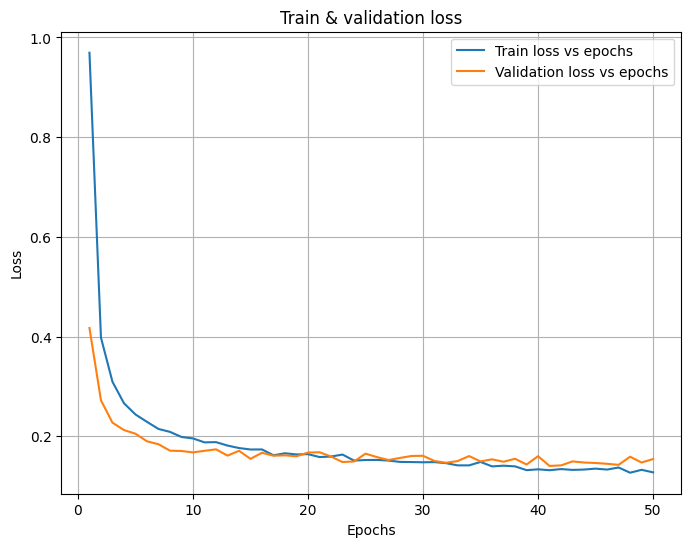

In [22]:
fig,ax=plt.subplots(figsize=(8,6))

vgg16_loss_values = history_cnn_with_vgg16.history['loss']
vgg16_val_loss_values = history_cnn_with_vgg16.history['val_loss']


epochs = range(1,len(vgg16_loss_values)+1)

ax.plot(epochs,vgg16_loss_values,label='Train loss vs epochs')
ax.plot(epochs,vgg16_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

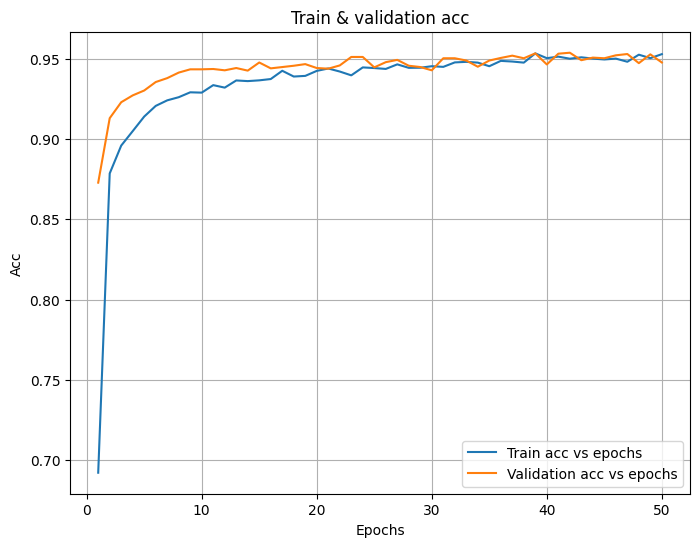

In [23]:
fig,ax=plt.subplots(figsize=(8,6))

vgg16_acc_values = history_cnn_with_vgg16.history['accuracy']
vgg16_val_acc_values = history_cnn_with_vgg16.history['val_accuracy']


epochs = range(1,len(vgg16_acc_values)+1)

ax.plot(epochs,vgg16_acc_values,label='Train acc vs epochs')
ax.plot(epochs,vgg16_val_acc_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

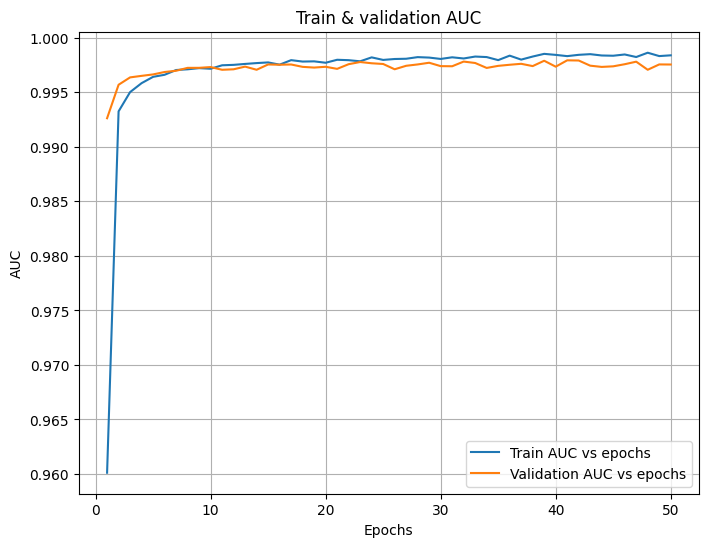

In [24]:
fig,ax=plt.subplots(figsize=(8,6))

vgg16_AUC_values = history_cnn_with_vgg16.history['auc']
vgg16_val_AUC_values = history_cnn_with_vgg16.history['val_auc']


epochs = range(1,len(vgg16_AUC_values)+1)

ax.plot(epochs,vgg16_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,vgg16_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [25]:
vgg16_test_class_pred = cnn_model_with_vgg16.predict(test_generator_vgg,steps=len(test_generator_vgg))

77/77 [==============================] - 397s 5s/step


In [26]:
vgg16_predicted_classes = np.argmax(vgg16_test_class_pred, axis=-1)
vgg16_predicted_classes

array([0, 0, 0, ..., 9, 6, 9])

In [27]:
test_true_classes = test_generator_vgg.classes
test_true_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [28]:
test_class_labels = list(test_generator_vgg.class_indices.keys()) 
test_class_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [29]:
test_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
test_class_labels_words = list(test_class_labels_mapping.values())
test_class_labels_words

['Tshirts',
 'Shirts',
 'casual_shoes',
 'watches',
 'sports_shoes',
 'kurtas',
 'handbags',
 'heels',
 'sunglasses',
 'wallets']

In [30]:
vgg16_cm_digits = confusion_matrix(test_true_classes, vgg16_predicted_classes)
vgg16_cm_digits

array([[1368,   34,    0,    0,    0,   11,    1,    0,    0,    0],
       [   8,  633,    0,    0,    0,    2,    0,    0,    0,    0],
       [   1,    1,  469,    0,   90,    0,    1,    7,    0,    0],
       [   0,    0,    0,  505,    0,    0,    2,    0,    0,    1],
       [   0,    0,   74,    0,  332,    0,    1,    0,    0,    0],
       [   2,    6,    0,    0,    0,  361,    0,    0,    0,    0],
       [   0,    1,    0,    1,    1,    0,  348,    0,    0,    1],
       [   0,    0,    5,    0,    3,    0,    4,  252,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  213,    0],
       [   0,    0,    0,    1,    0,    0,    4,    0,    0,  182]])

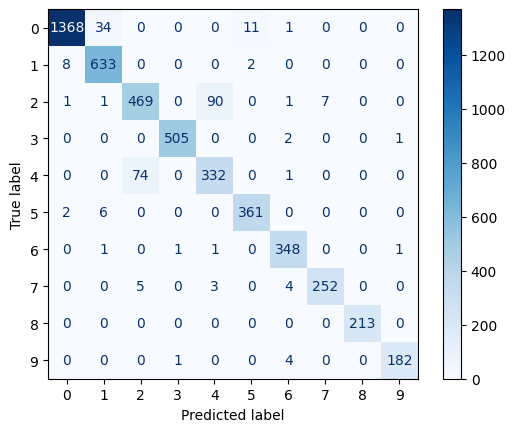

In [31]:
vgg16_disp = ConfusionMatrixDisplay(
    confusion_matrix=vgg16_cm_digits)

vgg16_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [32]:
vgg16_report = classification_report(test_true_classes, vgg16_predicted_classes, target_names=test_class_labels_words)
print(vgg16_report)

              precision    recall  f1-score   support

     Tshirts       0.99      0.97      0.98      1414
      Shirts       0.94      0.98      0.96       643
casual_shoes       0.86      0.82      0.84       569
     watches       1.00      0.99      1.00       508
sports_shoes       0.78      0.82      0.80       407
      kurtas       0.97      0.98      0.97       369
    handbags       0.96      0.99      0.98       352
       heels       0.97      0.95      0.96       264
  sunglasses       1.00      1.00      1.00       213
     wallets       0.99      0.97      0.98       187

    accuracy                           0.95      4926
   macro avg       0.95      0.95      0.95      4926
weighted avg       0.95      0.95      0.95      4926



### Model tuning

In [33]:
base_vgg_model_tune1 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_vgg_model.layers:
    layer.trainable = False

In [35]:
def custom_classifier_tune1(base_model, num_classes):
    x = base_model.output
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

In [36]:
cnn_model_with_vgg16_tune1 = custom_classifier_tune1(base_vgg_model_tune1, num_classes)

In [37]:
cnn_model_with_vgg16_tune1.compile(loss='categorical_crossentropy',
                             optimizer='Adam',
                             metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

In [ ]:
history_cnn_with_vgg16_tune1 = cnn_model_with_vgg16_tune1.fit(train_generator_vgg,
                                                  steps_per_epoch=len(train_generator_vgg),
                                                  epochs=50,
                                                  validation_data=val_generator_vgg,
                                                  validation_steps=len(val_generator_vgg))

Epoch 1/50
231/231 [==============================] - 4391s 19s/step - loss: 2.0633 - accuracy: 0.3062 - auc: 0.7299 - precision: 0.5004 - recall: 0.0424 - val_loss: 1.4161 - val_accuracy: 0.3609 - val_auc: 0.8854 - val_precision: 0.3543 - val_recall: 0.1416
Epoch 2/50
231/231 [==============================] - 4372s 19s/step - loss: 1.1218 - accuracy: 0.5653 - auc: 0.9295 - precision: 0.6952 - recall: 0.3949 - val_loss: 0.5550 - val_accuracy: 0.8014 - val_auc: 0.9832 - val_precision: 0.8682 - val_recall: 0.7114
Epoch 3/50
231/231 [==============================] - 4372s 19s/step - loss: 0.6764 - accuracy: 0.7400 - auc: 0.9732 - precision: 0.7929 - recall: 0.6770 - val_loss: 0.4381 - val_accuracy: 0.8290 - val_auc: 0.9877 - val_precision: 0.8555 - val_recall: 0.7941
Epoch 4/50
231/231 [==============================] - 4377s 19s/step - loss: 0.5176 - accuracy: 0.8052 - auc: 0.9833 - precision: 0.8350 - recall: 0.7690 - val_loss: 0.3539 - val_accuracy: 0.8604 - val_auc: 0.9916 - val_pre